# Programación probabilística y métodos bayesianos para hackers capítulo 1

<Table Class = "TFO-Portátiles-Botones" Align = "Izquierda">
  <td>
    <a Target = "_ en blanco" href = "https://colab.research.google.com/github/camdavidsonpilon/probababilistic-programming-and-bayesian-methods-for-hackers/blob/master/chapter1_introduction/ch1_introduction_tfp.ipynb" > <img height = "32px" src = "https://colab.research.google.com/img/colab_favicon.ico" /> Ejecutar en Google Colab </a>
  </td>
  <td>
    <A Target="_blank" href="https://github.com/camdavidsonpilon/probababilist-programming-and-bayesian-methods-for-hackers/blob/master/chapter1_introduction/ch1_introduction_tfp.ipynb"> <img src = " https://www.tensorflow.org/images/github-mark-32px.png "/> Ver fuente en GitHub </a>
  </td>
</ tabla>
<br>
<br>
<br>

Contenido original ([este portátil de jupyter] (https://nbviewer.jupyter.org/github/camdavidsonpilon/probababilistic-programming-and-bayesian-methods-for-hackers/blob/master/chapter1_introduction/ch1_introduction_pymc2.ipynb)) creado por Cam Davidson-Pilon ([`@ cmrn_dp`] (https://twitter.com/cmrn_dp))

Portado a [TensorFlow Probabilidad] (https://www.tensorflow.org/probability/) por Matthew McPeer ([`@ matthewmcateer0`] (https://twitter.com/matthewmcateer0)) y Bryan Seybold, con Ayuda de la Equipo de TFP en Google ([`tfprobability @ tensorflow.org`] (Mailto: tfprobability@tensorflow.org)).

Bienvenido a los métodos bayesianos para hackers. El repositorio completo de GitHUB está disponible en [GitHB / Probabilistic-Programing-Programing-y-Bayesian-Methods-for-hackers] (https://github.com/camdavidsonpilon/probabababababababababababababababababababababilistic-programming-and-bayesian-methods-for-hackers). Los otros capítulos se pueden encontrar en la [página de inicio] del proyecto (https://camdavidsonpilon.github.io/probabababilistic-programming-and-bayesian-methods-for-hackers/). ¡Esperamos que disfrute del libro, ¡y fomentamos alguna contribución!

---
### Tabla de contenido
- Dependencias y requisitos previos.
- La filosofía de la inferencia bayesiana.
- El estado mental bayesiano.
- inferencia bayesiana en la práctica
- ¿Son los métodos frecuentes incorrectos entonces?
- Nuestro marco bayesiano
- Ejemplo: Ejemplo obligatorio de monedas
- Ejemplo: error, o simplemente una característica dulce, involuntaria?
- Distribuciones de probabilidad
  - caso discreto
- Caso continuo
- ¿Pero qué es $ \ lambda \; $?
  - Ejemplo: infierir el comportamiento de los datos de mensajes de texto
- Presentamos nuestro primer martillo: probabilidad de TensorFlow
- Especifique la densidad de registro de la junta.
- Especifique el muestreador posterior.
- Ejecutar el gráfico de TF a la muestra de la parte posterior.
- trazar los resultados
- Interpretación
- Ejercicios
- Referencias

### dependencias y requisitos previos

<div clase = "Alerta alerta-éxito">
    La probabilidad de TensorFlow es parte del tiempo de ejecución predeterminado de Colab, <B> para que no necesite instalar la probabilidad de TensorFlow o TensorFlow si está ejecutando esto en el Colab </ b>.
    <br>
    Si está ejecutando este cuaderno en Jupyter en su propia máquina (y ya ha instalado TensorFlow), puede usar lo siguiente
    <br>
      <ul>
    <li> Para la instalación nocturna más reciente: <Code> PIP3 Install -Q TFP-Nightly </ Code> </ li>
    <li> para el lanzamiento más reciente de TFP estable: <Code> PIP3 Install -Q --Upgrade TensorFlow-Probabilidad </ Code> </ li>
    <LI> Para la versión conectada al GPU estable más reciente de TFP: <Code> PIP3 Install -Q --Upgrade TensorFlow-Probabilidad-GPU </ Code> </ li>
    <li> Para la versión conectada por la GPU nocturna más reciente de TFP: <Code> PIP3 Install -Q TFP-Nightly-GPU </ Code> </ li>
    </ ul>
Nuevamente, si está ejecutando esto en un colab, TensorFlow y TFP ya están instalados
</ div>

In [1]:
#@title Imports and Global Variables (make sure to run this cell)  { display-mode: "form" }

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


from __future__ import absolute_import, division, print_function


#@markdown This sets the warning status (default is `ignore`, since this notebook runs correctly)
warning_status = "ignore" #@param ["ignore", "always", "module", "once", "default", "error"]
import warnings
warnings.filterwarnings(warning_status)
with warnings.catch_warnings():
    warnings.filterwarnings(warning_status, category=DeprecationWarning)
    warnings.filterwarnings(warning_status, category=UserWarning)

import numpy as np
import os
#@markdown This sets the styles of the plotting (default is styled like plots from [FiveThirtyeight.com](https://fivethirtyeight.com/)
matplotlib_style = 'fivethirtyeight' #@param ['fivethirtyeight', 'bmh', 'ggplot', 'seaborn', 'default', 'Solarize_Light2', 'classic', 'dark_background', 'seaborn-colorblind', 'seaborn-notebook']
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
import matplotlib.axes as axes;
from matplotlib.patches import Ellipse
#%matplotlib inline
import seaborn as sns; sns.set_context('notebook')
from IPython.core.pylabtools import figsize
#@markdown This sets the resolution of the plot outputs (`retina` is the highest resolution)
notebook_screen_res = 'retina' #@param ['retina', 'png', 'jpeg', 'svg', 'pdf']
#%config InlineBackend.figure_format = notebook_screen_res

import tensorflow as tf

import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

class _TFColor(object):
    """Enum of colors used in TF docs."""
    red = '#F15854'
    blue = '#5DA5DA'
    orange = '#FAA43A'
    green = '#60BD68'
    pink = '#F17CB0'
    brown = '#B2912F'
    purple = '#B276B2'
    yellow = '#DECF3F'
    gray = '#4D4D4D'
    def __getitem__(self, i):
        return [
            self.red,
            self.orange,
            self.green,
            self.blue,
            self.pink,
            self.brown,
            self.purple,
            self.yellow,
            self.gray,
        ][i % 9]
TFColor = _TFColor()

def session_options(enable_gpu_ram_resizing=True, enable_xla=False):
    """
    Allowing the notebook to make use of GPUs if they're available.

    XLA (Accelerated Linear Algebra) is a domain-specific compiler for linear
    algebra that optimizes TensorFlow computations.
    """
    config = tf.config
    gpu_devices = config.experimental.list_physical_devices('GPU')
    if enable_gpu_ram_resizing:
        for device in gpu_devices:
           tf.config.experimental.set_memory_growth(device, True)
    if enable_xla:
        config.optimizer.set_jit(True)
    return config

session_options(enable_gpu_ram_resizing=True, enable_xla=True)

TensorFlow 2.x selected.


<module 'tensorflow_core._api.v2.config' from '/usr/local/lib/python3.6/dist-packages/tensorflow_core/_api/v2/config/__init__.py'>

## la filosofía de la inferencia bayesiana

> Eres un programador experto, pero los insectos aún se deslizan en su código. Después de una implementación particularmente difícil de un algoritmo, usted decide probar su código en un ejemplo trivial. Pasó. Usted prueba el código en un problema más difícil. Pasa una vez más. ¡Y pasa por la siguiente, aún más difícil, también! Está empezando a creer que no puede haber errores en este código ...

Si crees de esta manera, entonces felicidades, ¡ya estás pensando en Bayesian! La inferencia bayesiana simplemente está actualizando sus creencias después de considerar nuevas pruebas. Un bayesiano rara vez puede estar seguro de un resultado, pero él o ella puede ser muy seguro. Al igual que en el ejemplo anterior, nunca podemos estar 100% seguros de que nuestro código esté libre de errores a menos que lo pruebemos en cada problema posible; algo raramente posible en la práctica. En su lugar, podemos probarlo en una gran cantidad de problemas, y si sucede, podemos sentirnos más seguros de nuestro código, pero aún no está seguro. La inferencia bayesiana funciona de manera idéntica: actualizamos nuestras creencias sobre un resultado; Rara vez podemos estar absolutamente seguros a menos que descarte todas las demás alternativas.

## el estado mental bayesiano
La inferencia bayesiana difiere de una inferencia estadística más tradicional al preservar la incertidumbre. Al principio, esto suena como una mala técnica estadística. ¿No son las estadísticas sobre la certeza derivada de la aleatoriedad? Para reconciliar esto, debemos comenzar a pensar como bayesianos.

La visión mundial de Bayesia interpreta la probabilidad como medida de la creimiento en un evento, es decir, qué confianza estamos en un evento que ocurre. De hecho, veremos en un momento que esta es la interpretación natural de la probabilidad.

Para que esto sea más claro, consideramos una interpretación alternativa de probabilidad: frecuentes, conocida como la versión más clásica de las estadísticas, asume que la probabilidad es la frecuencia de eventos a largo plazo (de ahí el título otorgado). Por ejemplo, la probabilidad de accidentes planos bajo una filosofía de frecuentes se interpreta como la frecuencia a largo plazo de los accidentes planos. Esto hace que la sensación lógica para muchas probabilidades de eventos, pero se vuelve más difícil de entender cuando los eventos no tienen una frecuencia de ocurrencias a largo plazo. Considere: A menudo asignamos probabilidades a los resultados de las elecciones presidenciales, ¡pero la elección en sí misma solo sucede una vez! Los frecuentes se acercan esto al invocar realidades alternativas y decir en todas estas realidades, la frecuencia de las ocurrencias define la probabilidad.

Bayesianos, por otro lado, tienen un enfoque más intuitivo. Los bayesianos interpretan una probabilidad como medida de creencia, o confianza, de un evento que ocurre. Simplemente, una probabilidad es un resumen de una opinión. Una persona que asigna una creencia de 0 a un evento no tiene ninguna confianza que ocurrirá el evento; A la inversa, asignar una creencia de 1 implica que el individuo está absolutamente seguro de un evento que ocurra. Las creencias entre 0 y 1 permiten ponderaciones de otros resultados. Esta definición está de acuerdo con la probabilidad de un ejemplo de accidentes planos, por haber observado la frecuencia de los accidentes planos, la creencia de un individuo debe ser igual a esa frecuencia, excluyendo cualquier información externa. De manera similar, en virtud, en virtud de esta definición de probabilidad igual a las creencias, es significativo hablar sobre las probabilidades (creencias) de los resultados de las elecciones presidenciales: ¿qué tan seguro eres candidato a ganar?

Aviso en el párrafo anterior, asigné la creencia (probabilidad) a medida a un individuo, no a la naturaleza. Esto es muy interesante, ya que esta definición deja espacio para creencias en conflicto entre individuos. Nuevamente, esto es apropiado para lo que ocurre naturalmente: diferentes individuos tienen diferentes creencias de eventos que ocurren, porque poseen información diferente sobre el mundo. La existencia de diferentes creencias no implica que nadie esté mal. Considere los siguientes ejemplos que demuestran la relación entre las creencias y las probabilidades individuales:
*Volteo una moneda, y ambos adivinamos el resultado. Ambos estaríamos de acuerdo, suponiendo que la moneda es justa, que la probabilidad de cabezas es 1/2. Supongamos, entonces, que me visto en la moneda. Ahora sé con certeza cuál es el resultado: Asigno probabilidad 1.0 a las cabezas o colas (lo que sea). Ahora, ¿cuál es su creencia de que la moneda es cabezas? Mi conocimiento del resultado no ha cambiado los resultados de la moneda. Por lo tanto, asignamos diferentes probabilidades al resultado.

* Su código tiene un error o no, pero no sabemos con certeza que es cierto, aunque creemos sobre la presencia o ausencia de un error.

*Un paciente médico exhibe síntomas *x *, *y *y *z *. Hay una serie de enfermedades que podrían estar causando a todos, pero solo hay una enfermedad única. Un médico tiene creencias sobre qué enfermedad, pero un segundo médico puede tener creencias ligeramente diferentes.

Esta filosofía de tratar las creencias como probabilidad es natural para los humanos. Lo empleamos constantemente a medida que interactuamos con el mundo y solo vemos verdades parciales, pero recopilamos evidencia para formar creencias. Alternativamente, debes ser entrenado para pensar como un frecuentista.

Para alinearnos con la notación de probabilidad tradicional, denotamos nuestra creencia sobre el evento $ A $ como $ P (A) $. Llamamos a esta cantidad la probabilidad previa.

John Maynard Keynes, un gran economista y un pensador, dijo: "Cuando los hechos cambian, cambio de opinión. ¿Qué haces, señor?" Esta cita refleja la forma en que un bayesiano actualiza sus creencias después de ver evidencia. Incluso, especialmente, si la evidencia es contraria a lo que se creía inicialmente, la evidencia no puede ser ignorada. Denotamos nuestra creencia actualizada como $ p (a | x) $, interpretada como la probabilidad de $ a $ dada la evidencia $ x $. Llamamos a la creencia actualizada la probabilidad posterior para contrastarla con la probabilidad previa. Por ejemplo, considere las probabilidades posteriores (lee: creencias posteriores) de los ejemplos anteriores, después de observar alguna evidencia $ x $:


1. $ P (a) $: La moneda tiene un 50 por ciento de posibilidades de ser cabezas. $ P (A | X) $: Miras la moneda, observa una cabeza ha aterrizado, denota esta información $ x $ y asigna trivialmente la probabilidad 1.0 a las cabezas y 0.0 a las colas.

2. $ P (a) $: este código grande y complejo probablemente tenga un error. $ P (A | X) $: El código pasó todas las pruebas de $ x $; Todavía podría haber un error, pero su presencia es menos probable que ahora.

3. $ P (a) $: el paciente podría tener cualquier cantidad de enfermedades. $ P (A | X) $: Realizar un análisis de sangre generó evidencia $ x $, descartando algunas de las posibles enfermedades de la consideración.

Está claro que en cada ejemplo no descartamos por completo la creencia previa después de ver una nueva evidencia $ x $, pero volvimos a poner en marcha lo antes de incorporar la nueva evidencia (es decir, ponemos más peso o confianza, en algunas creencias versus otras) .

Al introducir la incertidumbre previa sobre los eventos, ya estamos admitiendo que cualquier conjetura que hagamos está potencialmente muy mal. Después de observar datos, evidencia u otra información, actualizamos nuestras creencias y nuestra suposición se vuelve menos incorrecta. Este es el lado alternativo de la moneda de predicción, donde generalmente tratamos de tener más razón.




## Inferencia bayesiana en la práctica
Si el frecentista y la inferencia bayesiana fueron funciones de programación, con los insumos que son problemas estadísticos, los dos serían diferentes en lo que regresan al usuario. La función de inferencia frecuentista devolvería un número, que representa una estimación (generalmente una estadística de resumen como el promedio de la muestra, etc.), mientras que la función bayesiana devolvería las probabilidades.

Por ejemplo, en nuestro problema de depuración anterior, llamando a la función del frecentista con el argumento "Mi código aprobó todas las pruebas de $ X $; ¿Mi código está libre de errores?" devolvería un sí. Por otro lado, preguntando a nuestra función de Bayesia "A menudo, mi código tiene errores. Mi código aprobó todas las pruebas de $ X $; ¿Mi código está libre de errores?" devolvería algo muy diferente: probabilidades de sí y no. La función podría devolver:

> Sí, con probabilidad 0.8; No, con probabilidad 0.2

Esto es muy diferente de la respuesta que se devuelve la función de frecuentismo. Observe que la función bayesiana aceptó un argumento adicional: "A menudo mi código tiene errores". Este parámetro es el anterior. Al incluir el parámetro anterior, estamos diciendo que la función bayesiana incluya nuestra creencia sobre la situación. Técnicamente, este parámetro en la función bayesiano es opcional, pero veremos excluyendo que tiene sus propias consecuencias.

### incorporando evidencia
A medida que adquirimos más y más casos de evidencia, nuestra nueva evidencia lava la creencia previa. Esto es de esperar. Por ejemplo, si su creencia previa es algo ridículo, como "Espero que el Sol explote hoy", y cada día se le resulte equivocado, esperará que cualquier inferencia lo corrija, o al menos alinee mejor sus creencias. La inferencia bayesiana corregirá esta creencia.

Denote $ N $ como el número de instancias de evidencia que poseemos. A medida que reunimos una cantidad infinita de evidencia, por ejemplo, como $ N → ∞, $ nuestros resultados bayesianos (a menudo) se alinean con los resultados frecuentistas. Por lo tanto, para N gran n, la inferencia estadística es más o menos objetiva. Por otro lado, para una pequeña $ N $, la inferencia es mucho más inestable: las estimaciones frecuentistas tienen más varianza e intervalos de confianza mayores. Aquí es donde el análisis bayesiano sobresale. Al introducir una probabilidad previa y de devolución (en lugar de una estimación escalar), preservamos la incertidumbre que refleja la inestabilidad de la inferencia estadística de un conjunto de datos N pequeño.

Uno puede pensar que durante $ N $ $, uno puede ser indiferente entre las dos técnicas, ya que ofrecen una inferencia similar, y pueden inclinarse hacia los métodos de frecuencia más simples y computacionalmente. Un individuo en esta posición debe considerar la siguiente cita de Andrew Gelman (2005) [[1]] (#scrollTO = nddph0r1abcn), antes de tomar dicha decisión:

Los tamaños de muestra nunca son grandes. Si $ N $, es demasiado pequeño para obtener una estimación suficientemente precisa, debe obtener más datos (o hacer más suposiciones). Pero una vez que $ n $, es "lo suficientemente grande", puede comenzar a subdividir los datos para aprender más (por ejemplo, en una encuesta de opinión pública, una vez que tenga una buena estimación para todo el país, puede estimar entre hombres y mujeres, Northerners y sureños, diferentes grupos de edad, etc.). $ N $, nunca es suficiente porque si fuera "suficiente", ya estaría en el siguiente problema para el que necesita más datos.

## ¿Los métodos frecuentes son incorrectos entonces?
No.

Los métodos frecuentes siguen siendo útiles o de última generación en muchas áreas. Las herramientas como mínimos cuadrados, la regresión lineal, la regresión de lazo y los algoritmos de maximización de la expectativa son todos poderosos y rápidos. Los métodos bayesianos complementan estas técnicas mediante la solución de problemas que estos enfoques no pueden, o al iluminar el sistema subyacente con un modelado más flexible.

### A Nota en * Big Data *
Paradójicamente, los problemas analíticos predictivos de los grandes datos se resuelven en realidad mediante algoritmos relativamente simples [[2]] (# ScrollTo = NDDPH0R1ABCN) [[3]] (# ScrollTo = NDDPH0R1ABCN). Por lo tanto, podemos argumentar que la dificultad de predicción de los grandes datos no se encuentra en el algoritmo utilizado, sino en las dificultades computacionales de almacenamiento y ejecución en grandes datos. (Uno también debe considerar la cita de Gelman desde arriba y pregunte "¿Realmente tengo datos grandes?")

Los problemas analíticos mucho más difíciles involucran datos medios y, especialmente los datos poco problemáticos, realmente pequeños. Utilizando un argumento similar a la de Gelman anterior, si los problemas de datos grandes son lo suficientemente grandes como para resolver fácilmente, deberíamos estar más interesados ​​en los conjuntos de datos suficientes más grandes.

## nuestro marco bayesiano
Estamos interesados en las creencias, que pueden interpretarse como probabilidades pensando en Bayesian.Tenemos una creencia previa en el evento A, creencias formadas por información previa, por ejemplo, nuestra creencia previa sobre los errores que están en nuestro código antes de realizar pruebas.

En segundo lugar, observamos nuestra evidencia.Para continuar con nuestro ejemplo de código de buggy: si nuestro código pasa las pruebas X, queremos actualizar nuestra creencia para incorporar esto.Llamamos a esta nueva creencia la probabilidad posterior.Actualización de nuestra creencia se realiza a través de la siguiente ecuación, conocida como teorema de Bayes, después de su descubridor Thomas Bayes:

$$ P (a | x) = \ frac {p (x | a) p (a)}} {p (x)} $$

$$ P (a | x) \ propto {p (x | a) p (a)} $$

Nota: ($ \ propto $ es "proporcional a")


La fórmula anterior no es exclusiva de la inferencia bayesiana: es un hecho matemático con usos fuera de la inferencia bayesiana.La inferencia bayesiana simplemente lo usa para conectar las probabilidades anteriores $ P (a) $ con una probabilidades posteriores actualizadas $ P (a | x) $.

## Ejemplo: ejemplo obligatorio de monedas de monedas
Cada texto de estadísticas debe contener un ejemplo de volteo con monedas, lo usaré aquí para sacarlo del camino.Supongamos, ingenuamente, que no está seguro de la probabilidad de cabezas en un flip de monedas (alerta de spoiler: es 50%).Usted cree que hay una verdadera relación subyacente, llámelo P, pero no tiene una opinión previa sobre lo que P podría ser.

Comenzamos a voltear una moneda y registrar las observaciones: H o T. Estos son nuestros datos observados.Una pregunta interesante que hacer es cómo cambia nuestra inferencia a medida que observamos más y más datos?Más específicamente, cómo se ven nuestras probabilidades posteriores cuando tenemos pocos datos, versus cuando tenemos muchos datos.

A continuación, trazamos una secuencia de actualización de probabilidades posteriores a medida que observamos cantidades cada vez mayores de datos (flips de monedas), al tiempo que demostramos algunas de las mejores prácticas cuando se trata de evaluar los tensores y trazar los datos.Primero, la parte fácil: definimos los valores en nuestro gráfico TensorFlow

In [ ]:
# Build Graph
rv_coin_flip_prior = tfp.distributions.Bernoulli(probs=0.5, dtype=tf.int32)

num_trials = tf.constant([0,1, 2, 3, 4, 5, 8, 15, 50, 500, 1000, 2000])

coin_flip_data = rv_coin_flip_prior.sample(num_trials[-1])

# prepend a 0 onto tally of heads and tails, for zeroth flip
coin_flip_data = tf.pad(coin_flip_data,tf.constant([[1, 0,]]),"CONSTANT")

# compute cumulative headcounts from 0 to 2000 flips, and then grab them at each of num_trials intervals
cumulative_headcounts = tf.gather(tf.cumsum(coin_flip_data), num_trials)

rv_observed_heads = tfp.distributions.Beta(
    concentration1=tf.cast(1 + cumulative_headcounts, tf.float32),
    concentration0=tf.cast(1 + num_trials - cumulative_headcounts, tf.float32))

probs_of_heads = tf.linspace(start=0., stop=1., num=100, name="linspace")
observed_probs_heads = tf.transpose(rv_observed_heads.prob(probs_of_heads[:, tf.newaxis]))

Finalmente, nos movemos a trazar nuestros tensores en Matplotlib.

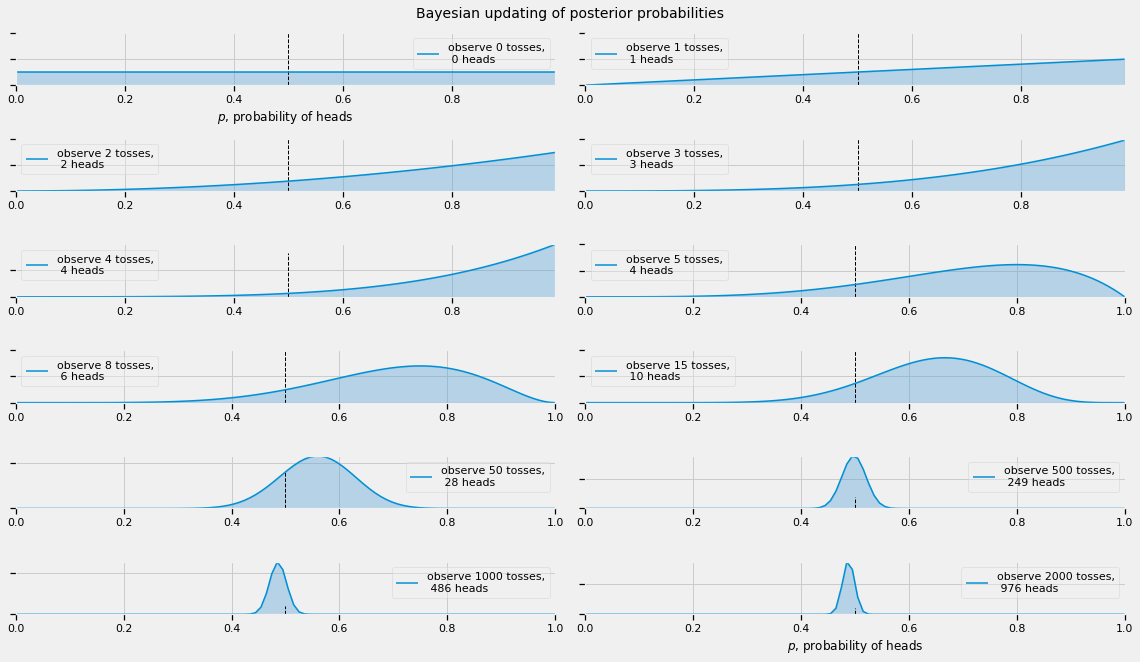

In [3]:
# For the already prepared, I'm using Binomial's conj. prior.
plt.figure(figsize(16, 9))
for i in range(len(num_trials)):
    sx = plt.subplot(len(num_trials)/2, 2, i+1)
    plt.xlabel("$p$, probability of heads") \
    if i in [0, len(num_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    plt.plot(probs_of_heads, observed_probs_heads[i], 
             label="observe %d tosses,\n %d heads" % (num_trials[i], cumulative_headcounts[i]))
    plt.fill_between(probs_of_heads, 0, observed_probs_heads[i], 
                     color=TFColor[3], alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities", y=1.02,
             fontsize=14)
plt.tight_layout()

Las probabilidades posteriores están representadas por las curvas, y nuestra incertidumbre es proporcional al ancho de la curva. Como muestra la trama anterior, a medida que empezamos a observar datos, nuestras probabilidades posteriores comienzan a cambiar y moverse. Eventualmente, a medida que observamos más y más datos (flips de monedas), nuestras probabilidades se apretarán más y más cerca del valor verdadero de $ P = 0.5 $ (marcado por una línea discontinua).

Observe que las parcelas no siempre se pone en su punto máximo a 0.5. No hay ninguna razón por la que debería ser: Reclamo que asumimos que no teníamos una opinión previa de lo que P es. De hecho, si observamos datos bastante extremos, dicen 8 flips y solo 1 cabezas observadas, nuestra distribución se vería muy sesgada de agrupar alrededor de 0.5 (sin una opinión anterior, ¿qué confianza le gustaría apostar en una moneda justa después de observar 8 colas? y 1 cabeza?). A medida que se acumulan más datos, veríamos cada vez más probabilidad de ser asignada a $ P = 0.5 $, aunque nunca todo eso.

El siguiente ejemplo es una demostración simple de las matemáticas de la inferencia bayesiana.

## Ejemplo: error, o simplemente una característica dulce, involuntaria?
Deje que $ A $ denote el evento que nuestro código no tiene errores en él.Deje $ X $ denote el evento que el código pase todas las pruebas de depuración.Por ahora, dejaremos la probabilidad previa de que no haya errores como variable, es decir, $ P (A) = P $.

Estamos interesados en $ P (a | x) $, es decir, la probabilidad de que no haya errores, dados nuestras pruebas de depuración $ x $.Para usar la fórmula anterior, necesitamos calcular algunas cantidades.

¿Qué es $ P (x | a) $, es decir, la probabilidad de que el código pase las pruebas de $ X $ dado que no hay errores?Bueno, es igual a 1, para que un código sin errores pasará todas las pruebas.

$ P (x) $ es un poco más complicado: el evento $ x $ se puede dividir en dos posibilidades, el evento X ocurre aunque nuestro código de hecho tiene errores (denotado $ ~A $, hablado no $ A $), o evento$ X $ sin errores $ (a) $.$ P (x) $ se puede representar como:

$$ \begin{align*}
P(A|X) &= \frac{P(X | A) P(A) }{P(X) } \\
 P(X) &= P(X \text{ and } A) + P(X \text{ and } \sim A) \\
  &= P(X|A)P(A) + P(X | \sim A)P(\sim A) \\
  &= P(X|A)p + P(X | \sim A)(1-p) \end{align*} $$


Ya hemos calculado $ P (x | a) $ arriba.Por otro lado, $ P (x | \ SIM A) $ es subjetivo: nuestro código puede pasar pruebas, pero aún tiene un error en él, aunque la probabilidad de que haya un error presente.Nota Esto depende de la cantidad de pruebas realizadas, el grado de complicación en las pruebas, etc. Seamos conservadores y asignemos $ P (x | \ SIM A) = 0.5 $.Entonces:

$$ \ comienza {align *}
P (a | x) & = \ frac {1 \ cdot p} {1 \ CDOT P +0.5 (1-P)} \\
& = \ frac {2 p} {1 + p} \ End {align *} $$

Esta es la probabilidad posterior.¿Cómo se ve en función de nuestro anterior, $ P \ en [0,1] $?

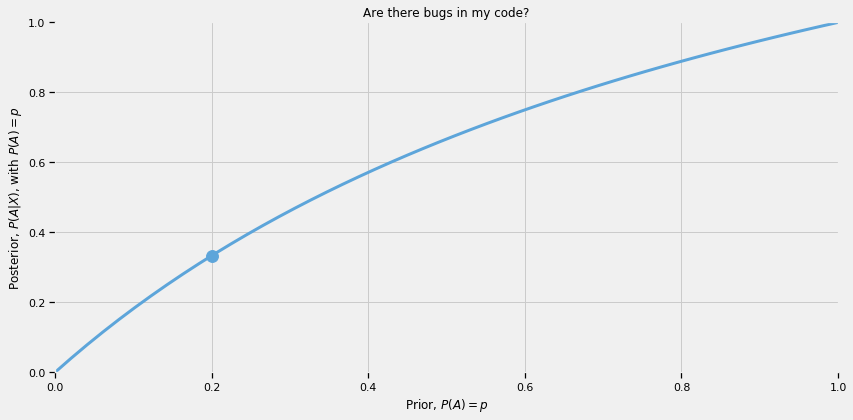

In [4]:
# Defining our range of probabilities
p = tf.linspace(start=0., stop=1., num=50)

# Visualization.
plt.figure(figsize=(12.5, 6))
plt.plot(p, 2*p/(1+p), color=TFColor[3], lw=3)
#plt.fill_between(p, 2*p/(1+p), alpha=.5, facecolor=["#A60628"])
plt.scatter(0.2, 2*(0.2)/1.2, s=140, c=TFColor[3])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel(r"Prior, $P(A) = p$")
plt.ylabel(r"Posterior, $P(A|X)$, with $P(A) = p$")
plt.title(r"Are there bugs in my code?");

Podemos ver las ganancias más grandes si observamos que las pruebas de $ X $ pasaban cuando la probabilidad previa, $ P $, es baja.Vamos a instalarse en un valor específico para el anterior.Soy un programador fuerte (creo), así que voy a darme una realista antes de 0.20, es decir, hay un 20% de probabilidad de que escribo el código libre de errores.Para ser más realistas, esta previa debe ser una función de lo complicado y lo grande que es el código, pero lo pidamos a 0.20.Entonces, mi creencia actualizada de que mi código es libre de errores es 0.33.

Recuerde que lo anterior es una probabilidad: $ P $ es la probabilidad previa de que no haya errores, por lo que $ 1 \ Text {-} P $ es la probabilidad previa de que haya errores.

De manera similar, nuestra posterior también es una probabilidad, con $ P (A | X) $ la probabilidad de que no haya un error dado que vimos todas las pruebas pasan, por lo tanto, $ 1 \ texto {-} p (a | x) $ es la probabilidad de que hayaUn error dado todas las pruebas aprobadas.¿Cómo se ve nuestra probabilidad posterior?A continuación se muestra un gráfico tanto de las probabilidades previas como las posteriores.

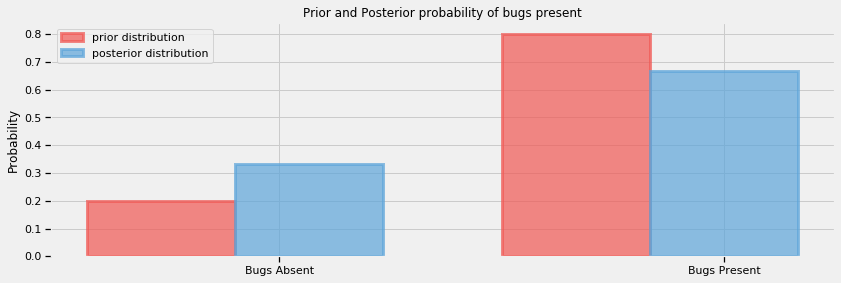

In [5]:
# Defining our priors and posteriors
prior = tf.constant([0.20, 0.80])
posterior = tf.constant([1./3, 2./3])

# Our Simple Visualization
plt.figure(figsize=(12.5, 4))
colours = [TFColor[0], TFColor[3]]
plt.bar([0, .7], prior, alpha=0.70, width=0.25,
        color=colours[0], label="prior distribution",
        lw="3", edgecolor=colours[0])
plt.bar([0+0.25, .7+0.25], posterior, alpha=0.7,
        width=0.25, color=colours[1],
        label=r"posterior distribution",
        lw="3", edgecolor=colours[1])

plt.xticks([0.20, .95], ["Bugs Absent", "Bugs Present"])
plt.title(r"Prior and Posterior probability of bugs present")
plt.ylabel("Probability")
plt.legend(loc="upper left");

Observe que después de que ocurrieron $ X $, se produce la probabilidad de que los errores están ausentes aumentan.Al aumentar el número de pruebas, podemos acercarnos a la confianza (probabilidad 1) que no hay errores presentes.

Este fue un ejemplo muy simple de la inferencia bayesiana y la regla de Bayes.Desafortunadamente, las matemáticas necesarias para realizar una inferencia bayesiana más complicada solo se vuelven más difíciles, a excepción de los casos construidos artificialmente.Más adelante veremos que este tipo de análisis matemático es en realidad innecesario.Primero debemos ampliar nuestras herramientas de modelado.La siguiente sección se ocupa de las distribuciones de probabilidad.Si ya está familiarizado, siéntase libre de omitir (o al menos SKIM), pero para los menos familiares, la siguiente sección es esencial.

## Distribuciones de probabilidad
Recordemos rápidamente lo que es una distribución de probabilidad: Deje que $ z $ sea una variable aleatoria. Luego, asociado con $ Z $ es una función de distribución de probabilidad que asigna probabilidades a los diferentes resultados que pueden tomar $ Z $. Gráficamente, una distribución de probabilidad es una curva donde la probabilidad de un resultado es proporcional a la altura de la curva. Puedes ver ejemplos en la primera figura de este capítulo.

Podemos dividir variables aleatorias en tres clasificaciones:

* $ Z $ es discreto: las variables aleatorias discretas solo pueden asumir valores en una lista específica. Cosas como poblaciones, calificaciones de películas y número de votos son todas las variables aleatorias discretas. Las variables aleatorias discretas se vuelven más claras cuando los contrastamos con ...

* $ Z $ es continuo: la variable aleatoria continua puede asumir valores arbitrariamente exactos. Por ejemplo, la temperatura, la velocidad, el tiempo, el color se modelan como variables continuas porque puede hacer que los valores progresivamente sean cada vez más precisos.

* $ Z $ se mezcla: las variables aleatorias mixtas asignan probabilidades a las variables aleatorias tanto discretas como continuas, es decir, es una combinación de las dos categorías anteriores.

### caso discreto

Si $ z $ es discreta, entonces su distribución se llama una función de masa de probabilidad *, que mide la probabilidad de $ z $ toma el valor $ k $, denotado $ P (Z = k) $. Tenga en cuenta que la función de la masa de probabilidad describe completamente la variable aleatoria $ z $, es decir, si conocemos la función masiva, sabemos cómo se debe comportar $ z $. Hay funciones de masa de probabilidad popular que aparecen constantemente: los presentaremos según sea necesario, pero introduzcamos la primera función de masa de probabilidad muy útil. Decimos $ z $ es * Poisson * -Distribuido si:
 
$$ P (z = k) = \ frac {\ lambda ^ k e ^ {- \ lambda}} {k!}, \; \; k = 0,1,2, \ puntos $$


$ \ lambda $ se llama un parámetro de la distribución, y controla la forma de la distribución. Para la distribución de Poisson, $ \ lambda $ puede ser cualquier número positivo. Al aumentar $ \ lambda $, agregamos más probabilidad a los valores más grandes, y a la inversa, disminuyendo $ \ lambda $, agregamos más probabilidad a valores más pequeños. Uno puede describir $ \ lambda $ como la * Intensidad * de la distribución de Poisson.

A diferencia de $ \ lambda $, que puede ser cualquier número positivo, el valor $ K $ en la fórmula anterior debe ser un entero no negativo, es decir, $ K $ debe tomar valores 0,1,2, y así sucesivamente. Esto es muy importante, porque si quisiera modelar una población, no podría tener sentido de las poblaciones con 4.25 o 5.612 miembros.


Si una variable aleatoria $ Z $ tiene una distribución de masa de Poisson, denotamos esto escribiendo
 
$$ Z \ SIM \ Text {POI} (\ lambda) $$
 
Una propiedad útil de la distribución de Poisson es que su valor esperado es igual a su parámetro, es decir:

$$ E \ grande [\; z \; | \; \ lambda \; \ grande] = \ lambda $$


Usaremos esta propiedad a menudo, por lo que es útil recordar. A continuación, trazamos la distribución de masas de probabilidad para diferentes valores de $ \ lambda $. Lo primero que debe notar es que al aumentar $ \ lambda $, agregamos más probabilidad de que ocurran valores más grandes. En segundo lugar, observe que aunque la gráfica termina a las 15, las distribuciones no lo hacen. Asignan probabilidad positiva a cada entero no negativo.

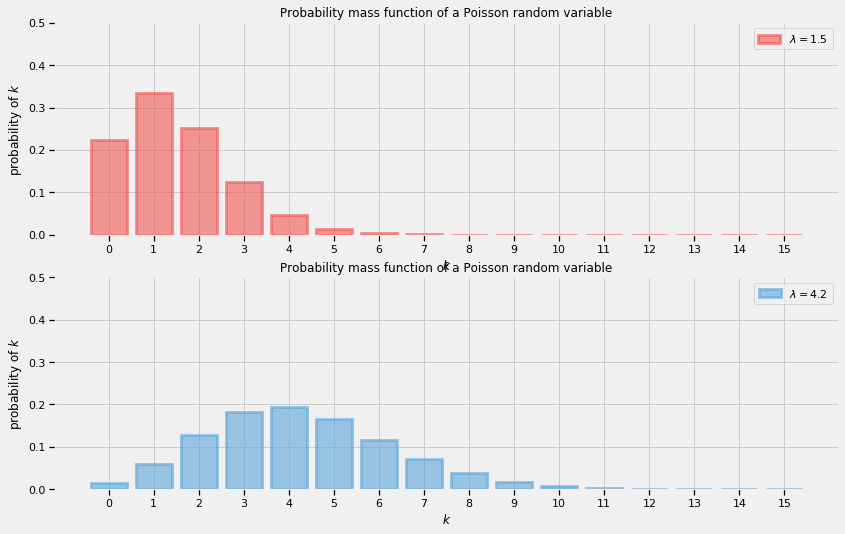

In [6]:
# Build graph.
x = tf.range (start=0., limit=16.,dtype=tf.float32)
lambdas = tf.constant([1.5, 4.25])

poi_pmf = tfd.Poisson(
  rate=lambdas[:, tf.newaxis]).prob(x)

plt.figure(figsize=(12.5, 8))

# Display results in two different histograms, for easier comparison
colours = [TFColor[0], TFColor[3]]
for i in [0,1]:
  ax = plt.subplot(2,1,i+1)
  ax.set_autoscaley_on(False)
  plt.title("Probability mass function of a Poisson random variable");

  plt.bar(x,
          poi_pmf[i],
          color=colours[i],
          label=r"$\lambda = %.1f$" % lambdas[i], alpha=0.60,
          edgecolor=colours[i], lw="3")
  plt.xticks(x)
  plt.ylim([0, .5])
  plt.legend()
  plt.ylabel(r"probability of $k$")
  plt.xlabel(r"$k$")

### caso continuo

En lugar de una función de en masa de probabilidad, una variable aleatoria continua tiene una función de densidad de probabilidad *. Esto podría parecer una nomenclatura innecesaria, pero la función de densidad y la función de masa son criaturas muy diferentes. Un ejemplo de la variable aleatoria continua es una variable aleatoria con * densidad exponencial *. La función de densidad para una variable aleatoria exponencial se ve así:

$$ F_Z (z | \ lambda) = \ lambda e ^ {- \ lambda z}, \; \; z \ ge 0 $$
 
Al igual que una variable aleatoria de Poisson, una variable aleatoria exponencial puede asumir solo valores no negativos. Pero a diferencia de una variable de Poisson, la exponencial puede asumir los valores no negativos, incluidos los valores no integrales, como 4.25 o 5.612401. Esta propiedad lo convierte en una mala opción para los datos de conteo, que deben ser un número entero, pero una gran opción para los datos de tiempo, los datos de temperatura (medidos en Kelvins, por supuesto), o cualquier otra variable precisa * y positiva *. La siguiente gráfica muestra dos funciones de densidad de probabilidad con diferentes valores de $ \ lambda $.

Cuando una variable aleatoria $ z $ tiene una distribución exponencial con parámetro $ \ lambda $, decimos * $ z $ es exponencial * y escribe

$$ z \ sim \ texto {exp} (\ lambda) $$
 
Dado un $ \ lambda $, el valor esperado de una variable aleatoria exponencial es igual a la inversa de $ \ lambda $, es decir:

$$ E [\; Z \; | \; \ lambda \;] = \ frac {1} {\ lambda} $$

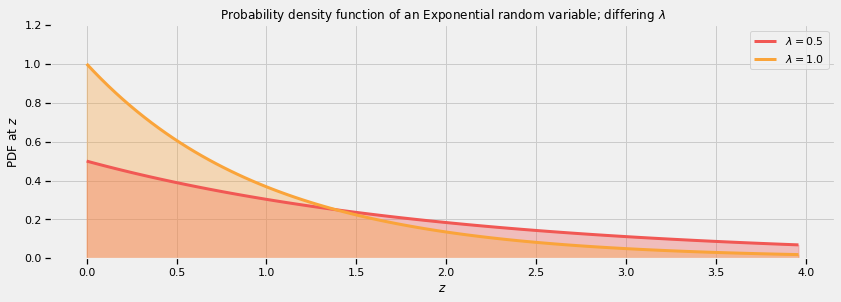

In [7]:
# Defining our Data and assumptions (use tf.linspace for continuous)
a = tf.range(start=0., limit=4., delta=0.04)
a = a[..., tf.newaxis]
lambdas = tf.constant([0.5, 1.])

# Now we use TFP to compute probabilities in a vectorized manner.
expo_pdf = tfd.Exponential(rate=lambdas).prob(a)

# Visualizing our results
plt.figure(figsize=(12.5, 4))
for i in range(lambdas.shape[0]):
    plt.plot(tf.transpose(a)[0], tf.transpose(expo_pdf)[i],
             lw=3, color=TFColor[i], label=r"$\lambda = %.1f$" % lambdas[i])
    plt.fill_between(tf.transpose(a)[0], tf.transpose(expo_pdf)[i],
                         color=TFColor[i], alpha=.33)
plt.legend()
plt.ylabel("PDF at $z$")
plt.xlabel("$z$")
plt.ylim(0,1.2)
plt.title(r"Probability density function of an Exponential random variable; differing $\lambda$");


## ¿Pero qué es $ \ lambda \; $?

** Esta pregunta es lo que motiva las estadísticas **. En el mundo real, $ \ lambda $ está oculto de nosotros. Solo vemos $ z $, y debe ir hacia atrás para tratar de determinar $ \ lambda $. El problema es difícil porque no hay un mapeo de uno a uno de $ z $ a $ \ lambda $. Se han creado muchos métodos diferentes para resolver el problema de estimar $ \ lambda $, pero desde $ \ lambda $ nunca se ha observado, nadie puede decir con certeza, ¿qué método es mejor?

La inferencia bayesiana se ocupa de las creencias * sobre qué $ \ lambda $ podría ser. En lugar de tratar de adivinar $ \ lambda $ exactamente, solo podemos hablar de lo que es probable que sea $ \ lambda $ al asignar una distribución de probabilidad a $ \ lambda $.
 
Esto podría parecer extraño al principio. Después de todo, se soluciona $ \ lambda $; ¡No es (necesariamente) al azar! ¿Cómo podemos asignar probabilidades a los valores de una variable no aleatoria? Ah, hemos caído por nuestra forma de pensar vieja y frecuente. Recuerde que bajo la filosofía de Bayesia, nosotros * podemos * asignar probabilidades si los interpretamos como creencias. Y es totalmente aceptable tener * creencias * sobre el parámetro $ \ lambda $.

#### Ejemplo: inferir el comportamiento de los datos de mensajes de texto
 
Intentemos modelar un ejemplo más interesante, uno que concierne a la tasa a la que un usuario envía y recibe mensajes de texto:

> Se le da una serie de recuentos diarios de mensajes de texto de un usuario de su sistema.Los datos, trazados con el tiempo, aparecen en la tabla a continuación.Tiene curiosidad por saber si los hábitos de mensajes de texto del usuario han cambiado con el tiempo, ya sea gradualmente o repentinamente.¿Cómo puedes modelar esto?(De hecho, estos son mis propios datos de mensajes de texto. Juzga mi popularidad como desee).

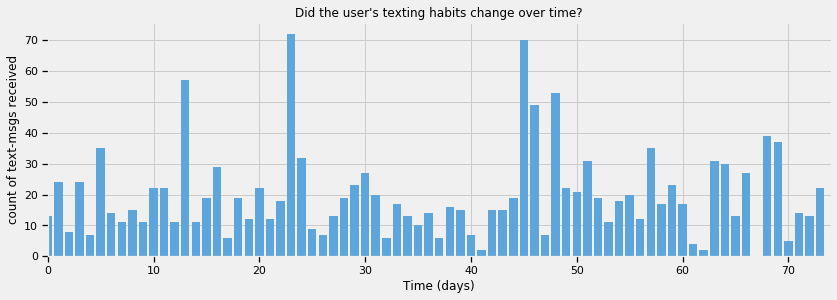

In [8]:
# Defining our Data and assumptions
count_data = tf.constant([
    13,  24,   8,  24,   7,  35,  14,  11,  15,  11,  22,  22,  11,  57,  
    11,  19,  29,   6,  19,  12,  22,  12,  18,  72,  32,   9,   7,  13,  
    19,  23,  27,  20,   6,  17,  13,  10,  14,   6,  16,  15,   7,   2,  
    15,  15,  19,  70,  49,   7,  53,  22,  21,  31,  19,  11,  18,  20,  
    12,  35,  17,  23,  17,   4,   2,  31,  30,  13,  27,   0,  39,  37,   
    5,  14,  13,  22,
], dtype=tf.float32)
n_count_data = tf.shape(count_data)
days = tf.range(n_count_data[0],dtype=tf.int32)

# Visualizing the Results
plt.figure(figsize=(12.5, 4))
plt.bar(days.numpy(), count_data, color="#5DA5DA")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data[0].numpy());

Antes de comenzar a modelar, vea lo que puede descubrir simplemente mirando el gráfico anterior. ¿Diría que hubo un cambio en el comportamiento durante este período de tiempo?
 
¿Cómo podemos comenzar a modelar esto? Bueno, como ya hemos visto convenientemente, una variable aleatoria de Poisson es un modelo muy apropiado para este tipo de datos * de conteo *. Denoting Day $ I $ 'S Mensaje de texto por $ C_I $,
 
$$ c_i \ sim \ text {Poisson} (\ lambda) $$
 
Sin embargo, no estamos seguros de cuál es el valor del parámetro $ \ lambda $. Mirando la tabla anterior, parece que la tasa podría ser más alta al final del período de observación, lo que es equivalente a decir que $ \ lambda $ aumenta en algún momento durante las observaciones. (Recuerde que un valor más alto de $ \ lambda $ asigna más probabilidad a resultados más grandes. Es decir, hay una mayor probabilidad de que se hayan enviado muchos mensajes de texto en un día determinado).
 
¿Cómo podemos representar esta observación matemáticamente? Supongamos que algún día durante el período de observación (llámelo $ \ tau $), el parámetro $ \ lambda $ de repente salta a un valor más alto. Así que realmente tenemos dos parámetros $ \ lambda $: uno para el período anterior a $ \ tau $, y uno para el resto del período de observación. En la literatura, una transición repentina como esta se llamaría *punto de conmutación *:
 
$$ \ lambda =
\ begin {casos} \ lambda_1 & \ text {if} t \ lt \ tau \ cr
\ lambda_2 & \ text {if} t \ ge \ tau
\ end {casos}
$$

Si, en realidad, no se produjo un cambio repentino y, de hecho, $ \ lambda_1 = \ lambda_2 $, entonces las distribuciones posteriores de $ \ lambda $ s deberían parecer iguales.

Estamos interesados ​​en inferir los $ \ lambda $ s desconocidos. Para usar la inferencia bayesiana, necesitamos asignar probabilidades anteriores a los diferentes valores posibles de $ \ lambda $. ¿Cuáles serían buenas distribuciones de probabilidad previas para $ \ lambda_1 $ y $ \ lambda_2 $? Recuerde que $ \ lambda $ puede ser cualquier número positivo. Como vimos anteriormente, la distribución * exponencial * proporciona una función de densidad continua para números positivos, por lo que podría ser una buena opción para modelar $ \ lambda_i $. Pero recuerde que la distribución exponencial toma un parámetro propio, por lo que tendremos que incluir ese parámetro en nuestro modelo. Llamemos a ese parámetro $ \ alpha $.
$$
\ comienzan {align}
& \ lambda_1 \ sim \ text {exp} (\ alpha) \\ \\
& \ lambda_2 \ sim \ text {exp} (\ alpha)
\ End {align}
$$
$ \ Alpha $ se llama a * Hyper-Parameter * o * Parent Variable *. En términos literales, es un parámetro que influye en otros parámetros. Nuestra conjetura inicial a $ \ Alpha $ no influye en el modelo con demasiada fuerza, por lo que tenemos cierta flexibilidad en nuestra elección. Una buena regla general es establecer el parámetro exponencial igual a la inversa del promedio de los datos de conteo. Dado que estamos modelando $ \ lambda $ utilizando una distribución exponencial, podemos usar la identidad del valor esperado que se muestra antes para obtener:

$$ \ frac {1} {n} \ sum_ {i = 0} ^ n \; c_i \ aprox e [\; \ lambda \; | \; \ alfa] = \ frac {1} {\ alfa} $$
 
Una alternativa, y algo que animo al lector a probar, sería tener dos primos: uno por cada $ \ lambda_i $. Crear dos distribuciones exponenciales con diferentes valores de $ \ alfa $ refleja nuestra creencia previa de que la tasa cambió en algún momento durante las observaciones.
 
¿Qué hay de $ \ tau $? Debido a la ruidez de los datos, es difícil elegir a priori cuando se haya producido $ \ tau $. En su lugar, podemos asignar una creencia previa de * uniforme * a todos los días posible. Esto es equivalente a decir
$$
\ comienzan {align}
& \ tau \ sim \ text {discreteUniform (1,70)} \\ \\
& \ Rudotrow p (\ tau = k) = \ frac {1} {70}
\ End {align}
$$
Entonces, después de todo esto, ¿cómo se ve nuestra distribución previa general para las variables desconocidas? Francamente, * no importa *. Lo que deberíamos entender es que es un desastre feo y complicado que involucra a símbolos, solo un matemático podría amar. Y las cosas solo se volverán más feas, más complicadas se conviertan en que nuestros modelos se conviertan. En cualquier caso, todo lo que realmente nos preocupamos es la distribución posterior.

Luego pasamos a [Probabilidad de Flow TensorFlow] (https://tensorflow.org/probability), una biblioteca de Python para realizar análisis bayesianos que no se desanimó por el monstruo matemático que hemos creado.

## Presentación de nuestro primer martillo: probabilidad de flujo tensor

La probabilidad de TensorFlow (TFP) es una biblioteca de Python para programar el análisis bayesiano. Está destinado a científicos de datos, estadísticos, profesionales de aprendizaje automático y científicos. Dado que se basa en la pila TensorFlow (TF), trae los beneficios de tiempo de ejecución de TF al análisis bayesiano. Estos incluyen Write-Once Run-Many (capacidad para ejecutar su modelo de desarrollo en producción) y aceleraciones a través de hardware de última generación (GPU y TPU).

Dado que TFP es relativamente nuevo, la comunidad de TFP está desarrollando activamente la documentación,
Especialmente documentos y ejemplos que unen la brecha entre principiante y hacker. Uno de los objetivos principales de este libro es resolver ese problema, y ​​también demostrar por qué TFP es tan genial.

Modelaremos el problema anterior usando TFP. Este tipo de programación se llama *Programación probabilística *, un desafortunado nombre inapropiado que invoca ideas de código generado al azar y probablemente ha confundido y asustado a los usuarios lejos de este campo. El código no es aleatorio; Es probabilístico en el sentido de que creamos modelos de probabilidad utilizando variables de programación como componentes del modelo.

B. Cronin [[4]] (#scrollto = nddph0r1abcn) tiene una descripción muy motivadora de la programación probabilística:

> Otra forma de pensar sobre esto: a diferencia de un programa tradicional, que solo se ejecuta en las direcciones hacia adelante, se ejecuta un programa probabilístico tanto en la dirección hacia adelante como hacia atrás. Se ejecuta para calcular las consecuencias de las suposiciones que contiene sobre el mundo (es decir, el espacio modelo que representa), pero también se extiende desde los datos para restringir las posibles explicaciones. En la práctica, muchos sistemas de programación probabilística intercalará inteligentemente estas operaciones hacia adelante y hacia atrás para que sean de manera eficiente en las mejores explicaciones.

Debido a la confusión engendrada por el término *programación probabilística *, me abstendré de usarla. En cambio, simplemente diré *Programación *, ya que eso es realmente.
 
El código TFP es fácil de leer. La única cosa novedosa debería ser la sintaxis. Simplemente recuerde que estamos representando los componentes del modelo ($ \ tau, \ lambda_1, \ lambda_2 $) como variables.

## especifique la densidad de registro de la junta

Asumiremos que los datos son una consecuencia del siguiente modelo generativo:

$$ \ begin {align*}
\ lambda_ {1}^{(0)} & \ sim \ text {exponencial} (\ text {rate} = \ alpha) \\
\ lambda_ {2}^{(0)} & \ sim \ text {exponencial} (\ text {rate} = \ alpha) \\
\ tau & \ sim \ text {uniforme} [\ text {low} = 0, \ text {high} = 1) \\\
\ text {for} i & = 1 \ ldots n: \\
\ lambda_i & = \ begin {casos} \ lambda_ {1}^{(0)}, & \ tau> i/n \\ \ lambda_ {2}^{(0)}, & \ text {de lo contrario} \ end {casos}\\
 X_i & \ sim \ text {Poisson} (\ text {rate} = \ lambda_i)
\ end {align*} $$

Afortunadamente, este modelo se puede implementar fácilmente utilizando las distribuciones de TF y TFP:


Este código crea una nueva función `lambda_`, pero realmente podemos pensar que es una variable aleatoria: la variable aleatoria $ \ lambda $ desde arriba. La función [reunir] (https: // https: //www.tensorflow.org/api_docs/python/tf/gather) asigna `lambda_1` o` lambda_2` como el valor de `lambda_`, dependiendo de qué lado de` Tau` estamos en. Los valores de `lambda_` hasta` tau` son `lambda_1` y los valores posteriores son` lambda_2`.

Tenga en cuenta que debido a que `lambda_1`,` lambda_2` y `tau` son aleatorios,` lambda_` será aleatorio. ** No estamos ** arreglando ninguna variable todavía.

TFP realiza una inferencia probabilística evaluando los parámetros del modelo utilizando una función Junk_log_prob, que describiremos más en el Capítulo 2.

In [ ]:
def joint_log_prob(count_data, lambda_1, lambda_2, tau):
    tfd = tfp.distributions
 
    alpha = (1. / tf.reduce_mean(count_data))
    rv_lambda_1 = tfd.Exponential(rate=alpha)
    rv_lambda_2 = tfd.Exponential(rate=alpha)
 
    rv_tau = tfd.Uniform()
 
    lambda_ = tf.gather(
         [lambda_1, lambda_2],
         indices=tf.cast(tau * tf.cast(tf.size(count_data), dtype=tf.float32) <= tf.cast(tf.range(tf.size(count_data)), dtype=tf.float32), dtype=tf.int32))
    rv_observation = tfd.Poisson(rate=lambda_)
 
    return (
         rv_lambda_1.log_prob(lambda_1)
         + rv_lambda_2.log_prob(lambda_2)
         + rv_tau.log_prob(tau)
         + tf.reduce_sum(rv_observation.log_prob(count_data))
    )


# Define a closure over our joint_log_prob.
def unnormalized_log_posterior(lambda1, lambda2, tau):
    return joint_log_prob(count_data, lambda1, lambda2, tau)


Observe que la implementación es posiblemente muy cerca de ser una traducción de 1: 1 del modelo matemático.La principal diferencia es simplemente que una vez que hemos especificado el modelo probabilístico, devolvemos la suma de la Log_Probs.

## especifique la muestra posterior

In [ ]:
# wrap the mcmc sampling call in a @tf.function to speed it up
@tf.function(autograph=False)
def graph_sample_chain(*args, **kwargs):
  return tfp.mcmc.sample_chain(*args, **kwargs)

num_burnin_steps = 5000
num_results = 20000


# Set the chain's start state.
initial_chain_state = [
    tf.cast(tf.reduce_mean(count_data), tf.float32) * tf.ones([], dtype=tf.float32, name="init_lambda1"),
    tf.cast(tf.reduce_mean(count_data), tf.float32) * tf.ones([], dtype=tf.float32, name="init_lambda2"),
    0.5 * tf.ones([], dtype=tf.float32, name="init_tau"),
]


# Since HMC operates over unconstrained space, we need to transform the
# samples so they live in real-space.
unconstraining_bijectors = [
    tfp.bijectors.Exp(),       # Maps a positive real to R.
    tfp.bijectors.Exp(),       # Maps a positive real to R.
    tfp.bijectors.Sigmoid(),   # Maps [0,1] to R.  
]

step_size = 0.2

kernel=tfp.mcmc.TransformedTransitionKernel(
        inner_kernel=tfp.mcmc.HamiltonianMonteCarlo(
            target_log_prob_fn=unnormalized_log_posterior,
            num_leapfrog_steps=2,
            step_size=step_size,
            state_gradients_are_stopped=True),
        bijector=unconstraining_bijectors)

kernel = tfp.mcmc.SimpleStepSizeAdaptation(
    inner_kernel=kernel, num_adaptation_steps=int(num_burnin_steps * 0.8))


# Sample from the chain.
[
    lambda_1_samples,
    lambda_2_samples,
    posterior_tau,
], kernel_results = graph_sample_chain(
    num_results=num_results,
    num_burnin_steps=num_burnin_steps,
    current_state=initial_chain_state,
    kernel = kernel)
    
tau_samples = tf.floor(posterior_tau * tf.cast(tf.size(count_data),dtype=tf.float32))

In [11]:
print("acceptance rate: {}".format(
    tf.reduce_mean(tf.cast(kernel_results.inner_results.inner_results.is_accepted,dtype=tf.float32))))
print("final step size: {}".format(
    tf.reduce_mean(kernel_results.inner_results.inner_results.accepted_results.step_size[-100:])))


acceptance rate: 0.5755000114440918
final step size: 0.030197443440556526


## trazar los resultados

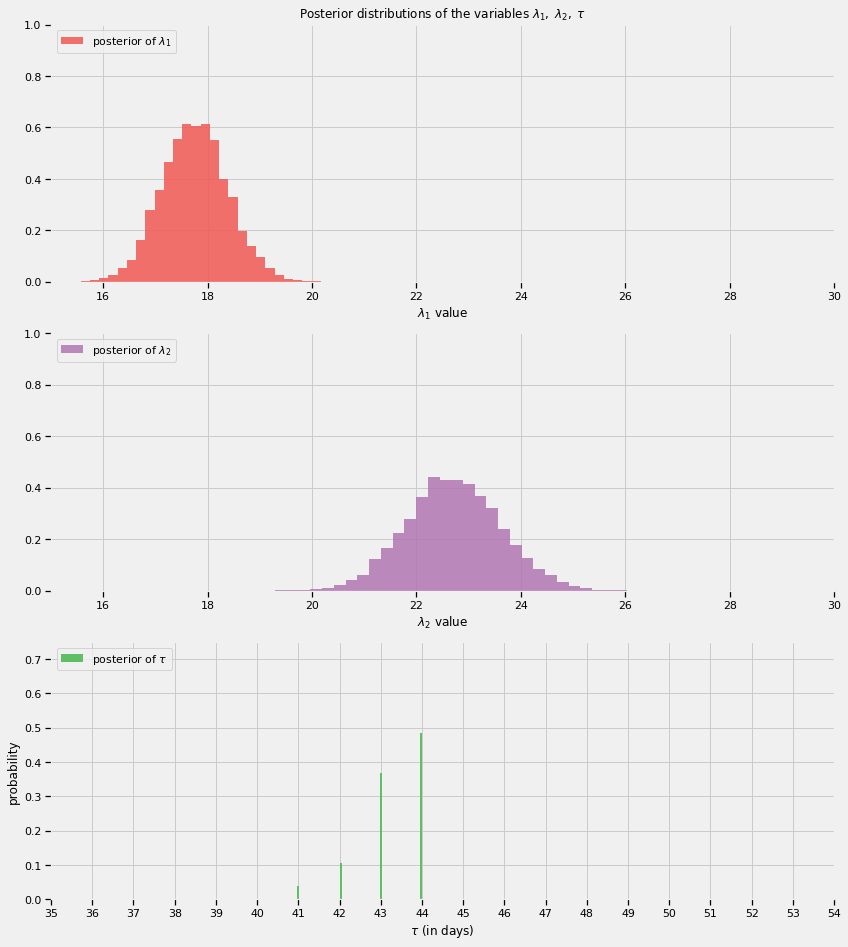

In [18]:
plt.figure(figsize=(12.5, 15))
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label=r"posterior of $\lambda_1$", color=TFColor[0], density=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel(r"$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label=r"posterior of $\lambda_2$", color=TFColor[6], density=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel(r"$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data[0], alpha=1,
         label=r"posterior of $\tau$",
         color=TFColor[2], weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data[0]))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel(r"probability");

## interpretación

Recuerde que la metodología bayesiana devuelve una * distribución *. Por lo tanto, ahora tenemos distribuciones para describir el desconocido $ \ lambda $ s y $ \ tau $. ¿Qué hemos ganado? Inmediatamente, podemos ver la incertidumbre en nuestras estimaciones: cuanto más amplia sea la distribución, cuanto menos debe ser nuestra creencia posterior. También podemos ver cuáles son los valores plausibles para los parámetros: $ \ lambda_1 $ es de alrededor de 18 y $ \ lambda_2 $ es alrededor de 23. Las distribuciones posteriores de los dos $ \ lambda $ s son claramente distintos, lo que indica que es probable que es probable que hubo un cambio en el comportamiento del mensaje de texto del usuario.

¿Qué otras observaciones puedes hacer? Si observa los datos originales nuevamente, ¿estos resultados parecen razonables?

Aviso también que las distribuciones posteriores para los $ \ lambda $ s no se parecen a distribuciones exponenciales, aunque nuestros Priors para estas variables fueron exponenciales. De hecho, las distribuciones posteriores no son realmente de ninguna forma que reconozcamos desde el modelo original. ¡Pero eso esta bien! Este es uno de los beneficios de tomar un punto de vista computacional. Si hubiéramos hecho este análisis utilizando enfoques matemáticos, habríamos estado atrapados con una distribución analíticamente intratable (y desordenada). Nuestro uso de un enfoque computacional nos hace indiferentes a la tractabilidad matemática.
 
Nuestro análisis también devolvió una distribución por $ \ tau $. Su distribución posterior se ve un poco diferente de las otras dos porque es una variable aleatoria discreta, por lo que no asigna probabilidades a los intervalos. Podemos ver que cerca del día 45, hubo un 50% de probabilidad de que el comportamiento del usuario cambió. No se produjo ningún cambio, o si el cambio hubiera sido gradual con el tiempo, la distribución posterior de $ \ tau $ se habría extendido más, lo que refleja que muchos días eran candidatos plausibles por $ \ tau $. Por el contrario, en los resultados reales, vemos que solo tres o cuatro días tienen algún sentido como posibles puntos de transición.

### ¿Por qué querría muestras de la parte posterior, de todos modos?

Nos ocuparemos de esta pregunta por el resto del libro, y es una subestimación decir que nos llevará a algunos resultados asombrosos. Por ahora, terminemos este capítulo con un ejemplo más.

Usaremos las muestras posteriores para responder la siguiente pregunta: ¿Cuál es el número esperado de textos al día $ T, \; 0 \ le t \ le 70 $? Recuerde que el valor esperado de una variable Poisson es igual a su parámetro $ \ lambda $. Por lo tanto, la pregunta es equivalente a * ¿Cuál es el valor esperado de $ \ lambda $ en el momento $ t $ *?
 
En el código a continuación, deje que $ i $ i índice muestras de las distribuciones posteriores. Dado un día $ t $, promediéramos todo lo posible $ \ lambda_i $ por ese día $ t $, usando $ \ lambda_i = \ lambda_ {1, i} $ si $ t \ lt \ tau_i $ (es decir, si el El cambio de comportamiento aún no ha ocurrido), de lo contrario usamos $ \ lambda_I = \ lambda_ {2, i} $.

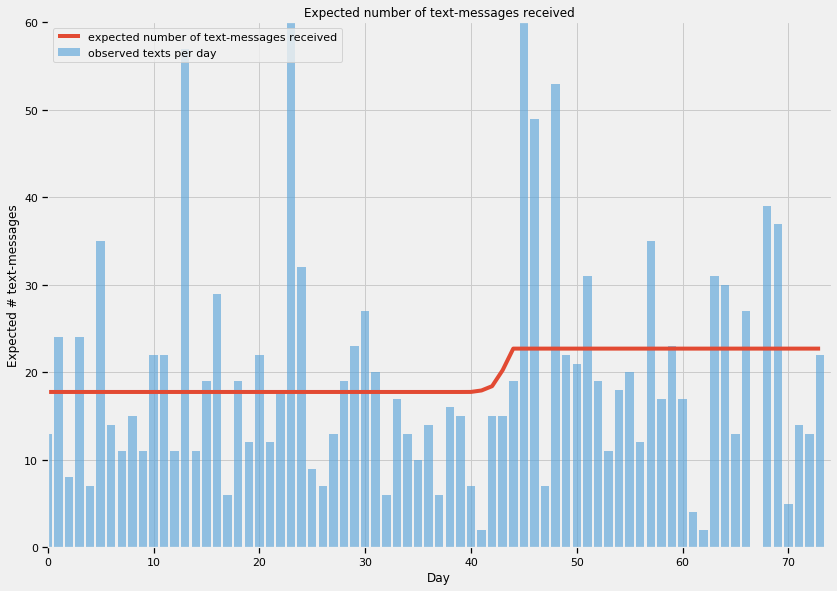

In [19]:
# tau_samples, lambda_1_samples, lambda_2_samples contain
# N samples from the corresponding posterior distribution

N_ = tau_samples.shape[0]
expected_texts_per_day = tf.zeros(N_,n_count_data.shape[0]) #(10000,74)

plt.figure(figsize=(12.5, 9))

day_range = tf.range(0,n_count_data[0],delta=1,dtype = tf.int32)

# expand from shape of 74 to (10000,74)
day_range = tf.expand_dims(day_range,0)
day_range = tf.tile(day_range,tf.constant([N_,1]))

# expand from shape of 10000 to 10000,74
tau_samples_per_day = tf.expand_dims(tau_samples,0)
tau_samples_per_day = tf.transpose(tf.tile(tau_samples_per_day,tf.constant([day_range.shape[1],1])))

tau_samples_per_day = tf.cast(tau_samples_per_day,dtype=tf.int32)
#ix_day is (10000,74) tensor where axis=0 is number of samples, axis=1 is day. each value is true iff sampleXday value is < tau_sample value
ix_day = day_range < tau_samples_per_day

lambda_1_samples_per_day = tf.expand_dims(lambda_1_samples,0)
lambda_1_samples_per_day = tf.transpose(tf.tile(lambda_1_samples_per_day,tf.constant([day_range.shape[1],1])))
lambda_2_samples_per_day = tf.expand_dims(lambda_2_samples,0)
lambda_2_samples_per_day = tf.transpose(tf.tile(lambda_2_samples_per_day,tf.constant([day_range.shape[1],1])))

expected_texts_per_day = ((tf.reduce_sum(lambda_1_samples_per_day*tf.cast(ix_day,dtype=tf.float32),axis=0) + tf.reduce_sum(lambda_2_samples_per_day*tf.cast(~ix_day,dtype=tf.float32),axis=0))/N_)

plt.plot(range(n_count_data[0]), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of text-messages received")
plt.xlim(0, n_count_data.numpy()[0])
plt.xlabel("Day")
plt.ylabel("Expected # text-messages")
plt.title("Expected number of text-messages received")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#5DA5DA", alpha=0.65,
        label="observed texts per day")

plt.legend(loc="upper left");

Nuestro análisis muestra un fuerte apoyo para creer que el comportamiento del usuario se cambió ($ \ lambda_1 $ habría estado cerca de valor a $ \ lambda_2 $ si no hubiera sido cierto), y que el cambio fue repentino en lugar de gradual (como se demuestra por $ \Tau $ 's Muy pico de la distribución posterior).Podemos especular qué podría haber causado esto: una tasa de mensajes de texto más barata, una reciente suscripción del clima a texto, o quizás una nueva relación.(De hecho, el día 45 corresponde a la Navidad, y me mudé a Toronto el próximo mes, dejando atrás a una novia).


## Ejercicios
 
1. Usando `lambda_1_samples` y` lambda_2_samples`, ¿cuál es la media de las distribuciones posteriores de $ \ lambda_1 $ y $ \ lambda_2 $?

In [ ]:
#type your code here.

2. ¿Cuál es el aumento del porcentaje esperado en las tasas de mensajes de texto?'Sugerencia: `Calcule la media de` lambda_1_samples / lambda_2_samples`.Tenga en cuenta que esta cantidad es muy diferente de `lambda_1_samples.mean () / lambda_2_samples.mean ()`

In [ ]:
#type your code here.

3. ¿Cuál es el medio de $ \ lambda_1 $ ** dado ** que sabemos $ \ tau $ es menos de 45?Es decir, supongamos que se nos ha dado una nueva información de que el cambio en el comportamiento ocurrió antes del día 45. ¿Cuál es el valor esperado de $ \ lambda_1 $ ahora?(No necesita rehacer la parte TFP. Solo considere todas las instancias en las que `tau_samples <45`.)

In [ ]:
#type your code here.

## References

[1] Gelman, Andrew. N.p.. Web. 22 Jan 2013. [N is never large enough](http://andrewgelman.com/2005/07/31/n_is_never_larg)
 
[2] Norvig, Peter. 2009. [The Unreasonable Effectiveness of Data](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/35179.pdf).

[3] Jimmy Lin and Alek Kolcz. Large-Scale Machine Learning at Twitter. Proceedings of the 2012 ACM SIGMOD International Conference on Management of Data (SIGMOD 2012), pages 793-804, May 2012, Scottsdale, Arizona.

[4] Cronin, Beau. "Why Probabilistic Programming Matters." 24 Mar 2013. Google, Online Posting to Google . Web. 24 Mar. 2013. <https://plus.google.com/u/0/107971134877020469960/posts/KpeRdJKR6Z1>.